In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

In [3]:
import glob

In [ ]:
#def load_files():
#for file in (glob.glob("data/*.csv")):
        
    
    

In [26]:
with open("data/2011 Stack Overflow Survey Results.csv", 'rb') as f:
    result_2011 = chardet.detect(f.read())

with open("data/2012 Stack Overflow Survey Results.csv", 'rb') as f:
    result_2012 = chardet.detect(f.read())

In [17]:
#pd.read_csv("data\\2011 Stack Overflow Survey Results.csv" , encoding = result_2011['encoding'], low_memory=False)

In [417]:
data_2011 = pd.read_csv("data/2011 Stack Overflow Survey Results.csv", encoding = result_2011['encoding'], low_memory=False)
data_2012 = pd.read_csv("data/2012 Stack Overflow Survey Results.csv", encoding = result_2012['encoding'], low_memory=False)
data_2013 = pd.read_csv("data/2013 Stack Overflow Survey Results.csv", low_memory=False)
data_2014 = pd.read_csv("data/2014 Stack Overflow Survey Results.csv", low_memory=False)
data_2015 = pd.read_csv("data/2015 Stack Overflow Survey Results.csv", header=1, low_memory=False)
data_2016 = pd.read_csv("data/2016 Stack Overflow Survey Results.csv", low_memory=False)

In [416]:
data_2019 = pd.read_csv("data/2019 Stack Overflow Survey Results.csv" , low_memory=False)
data_2018 = pd.read_csv("data/2018 Stack Overflow Survey Results.csv" , low_memory=False)
data_2017 = pd.read_csv("data/2017 Stack Overflow Survey Results.csv" , low_memory=False)

# Popularity of programming languages over the years

In [322]:
def clean_pop_lng(series,year,length = 5):
    l = series.fillna("Nil").apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    df = pd.DataFrame(pd.Series(flat_list).value_counts().head(length),columns =["Count"]).reset_index().rename(columns={"index":"Language"})
    df.drop(df[df['Language'] == "Nil" ].index , inplace=True)
    df["Year"] = year
    return (df)

def clean_pop_lng2(dataframe,columns,year,passs =False):
    df = pd.DataFrame(columns = ["Count"])
    for col in columns:
        if "Current Lang & Tech:" in col or passs ==True:
            dict_lang = dataframe[col].value_counts().to_dict()
            df.loc[list(dict_lang.keys())[0]] = dict_lang[list(dict_lang.keys())[0]]
    df = df.sort_values(by = "Count" ,ascending =False).reset_index().rename(columns={"index":"Language"}) 
    df["Year"] = year
    return(df.head(2))

def clean_pop_lng3(x):
    if "JavaScript" in x:
        return "JavaScript"
    if "Java" in x:
        return "Java"
    if "SQL" in x:
        return "SQL"
    if "HTML" in x or "CSS" in x:
        return "HTML/CSS"
    else:
        return x

most_pop_lng_df = pd.DataFrame(columns=["Language","Count","Year"])

most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2019.LanguageWorkedWith,2019)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2018.LanguageWorkedWith,2018)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2017.HaveWorkedLanguage,2017)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng(data_2016.tech_do,2016)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2015,data_2015.columns,2015)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2014,data_2014.iloc[:,42:54].columns,2014,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2013,data_2013.iloc[:,56:69].columns,2013,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2012,data_2012.iloc[:,22:35].columns,2012,True)])
most_pop_lng_df = pd.concat([most_pop_lng_df,clean_pop_lng2(data_2011,data_2011.iloc[:,30:41].columns,2011,True)])

most_pop_lng_df.reset_index(drop =True,inplace =True)
most_pop_lng_df.Language = most_pop_lng_df.Language.apply(clean_pop_lng3)
most_pop_lng_df

,Language,Count,Year
0,JavaScript,59219,2019
1,HTML/CSS,55466,2019
2,SQL,47544,2019
3,Python,36443,2019
4,Java,35917,2019
5,JavaScript,54686,2018
6,HTML/CSS,53628,2018
7,HTML/CSS,50979,2018
8,SQL,44670,2018
9,Java,35521,2018


In [ ]:
most_pop_lng_df.groupby()

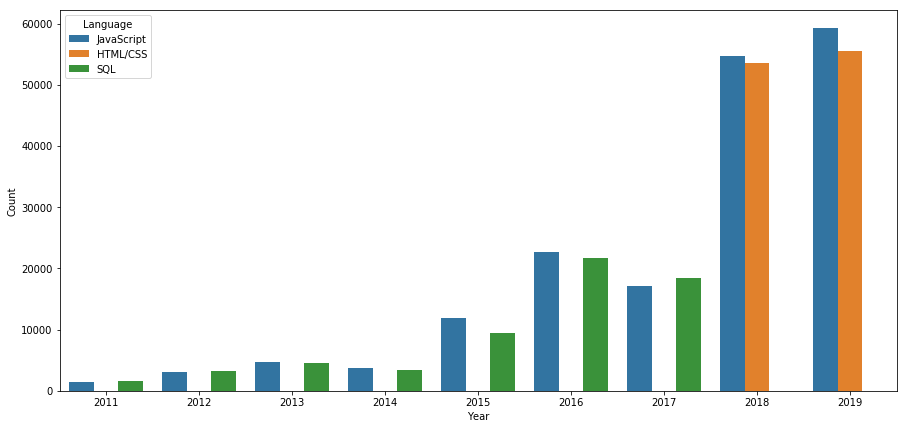

In [296]:
plt.figure(figsize =(15,7))
sns.barplot(x =most_pop_lng_df.Year ,y =most_pop_lng_df.Count ,hue=most_pop_lng_df.Language )
plt.show()

### Question 2: Does the age of developers influence which programming languages they know or want to learn?

In [401]:
def plot_age_lang(df,col):
    
    languages = ["HTML/CSS","JavaScript","Python","Java",
                 "C++","Bash/Shell/PowerShell","C#","PHP","SQL","C","TypeScript"]
    df.Age = df.Age.round()
    df[col] = df[col].fillna("Nil")
    
    for lang in languages:
        df[lang] = df[col].apply(lambda x : 1 if lang in x else 0)
    df = df[["Age"]+languages].groupby("Age").sum()
    df = df.loc[19:50]
    
    fig = df.loc[19:50].plot(figsize=(20,10), kind='line', colormap='gist_rainbow')

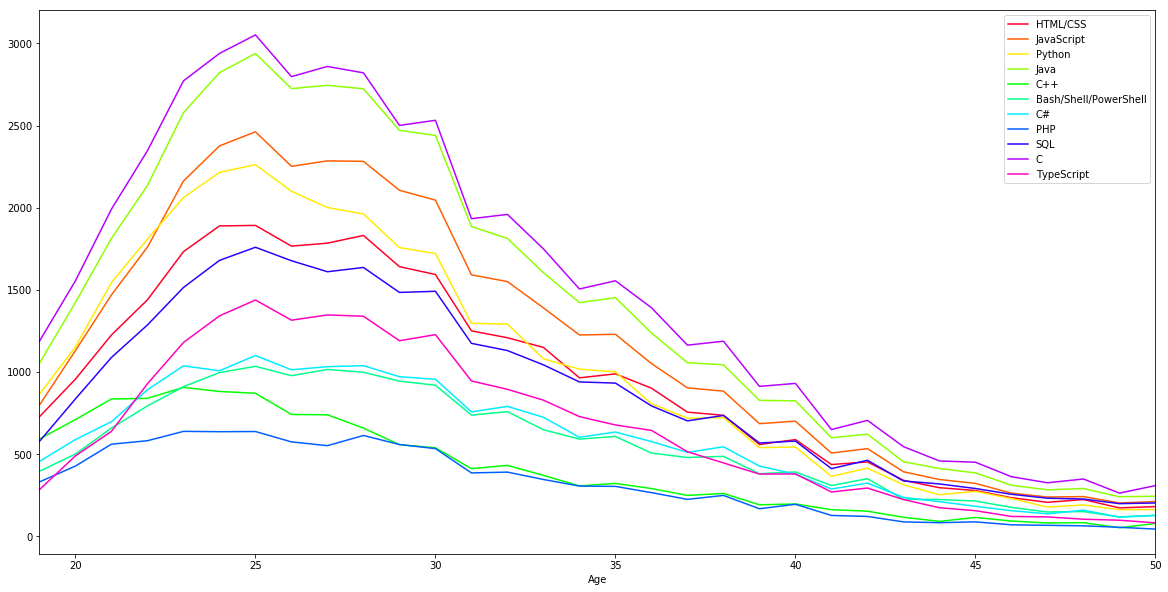

In [402]:
create_plot(data_2019,"LanguageDesireNextYear" )

In [403]:
data_2019.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [405]:
data_2019[['EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz']]

,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz
0,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN
2,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No
3,Taken an online course in programming or softw...,100 to 499 employees,"Developer, full-stack",3,16,Less than 1 year,Very satisfied,Slightly satisfied,Very confident,No,Not sure,I am not interested in new job opportunities,Less than a year ago,"Write code by hand (e.g., on a whiteboard);Int...",No
4,Taken an online course in programming or softw...,"10,000 or more employees","Academic researcher;Developer, desktop or ente...",16,14,9,Very dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,No,I am not interested in new job opportunities,Less than a year ago,"Write any code;Write code by hand (e.g., on a ...",No
5,Taken an online course in programming or softw...,NaN,Data or business analyst;Data scientist or mac...,13,15,3,Very satisfied,Slightly satisfied,Very confident,No,Yes,I am not interested in new job opportunities,1-2 years ago,Write any code;Complete a take-home project;In...,No
6,"Taught yourself a new language, framework, or ...","Just me - I am a freelancer, sole proprietor, ...","Designer;Developer, front-end",6,17,4,Slightly satisfied,Neither satisfied nor dissatisfied,NaN,NaN,NaN,"I’m not actively looking, but I am open to new...",NA - I am an independent contractor or self em...,Write any code,No
7,"Taught yourself a new language, framework, or ...",NaN,"Developer, back-end;Engineer, site reliability",8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Taken an online course in programming or softw...,10 to 19 employees,"Database administrator;Developer, back-end;Dev...",12,11,4,Slightly satisfied,Slightly satisfied,Somewhat confident,No,Not sure,"I’m not actively looking, but I am open to new...",Less than a year ago,Write any code;Interview with people in peer r...,Yes
9,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No


### How satisfied an person in a company based on some features  in 2019?

In [604]:
model_data = data_2019[["OrgSize","Age","Country","WorkChallenge",
                        "Gender","DevType","YearsCodePro","BetterLife","JobSat"]]

In [549]:
model_data.isna().sum()

OrgSize          17092
Age               9673
Country            132
WorkChallenge    20742
Gender            3477
DevType           7548
YearsCodePro     14552
BetterLife        2614
JobSat           17895
dtype: int64

In [560]:
model_data.Age.describe()

count    79210.000000
mean        30.336699
std          9.178390
min          1.000000
25%         24.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

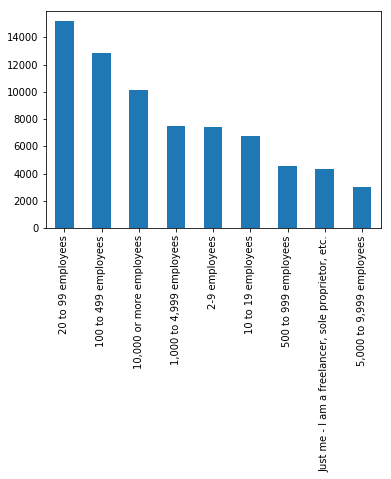

In [550]:
# explore organisation size distribution
model_data.OrgSize.value_counts().plot.bar()

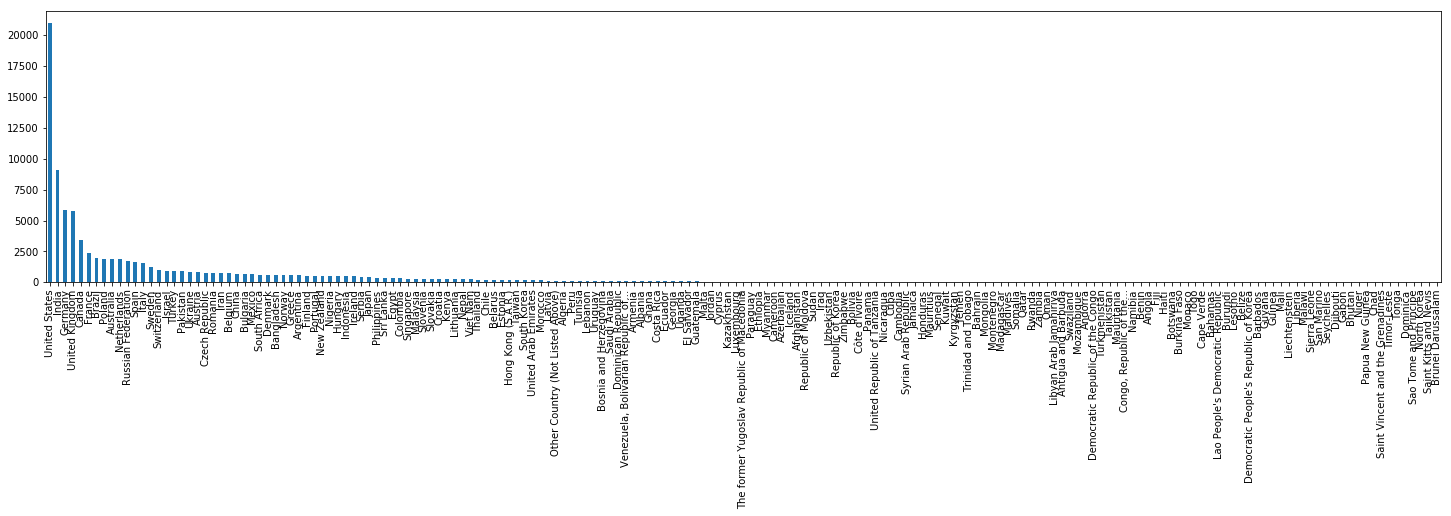

In [551]:
plt.figure(figsize =(25,5))
model_data.Country.value_counts().plot.bar()
plt.show()

In [554]:
model_data.Gender.value_counts()

Man                                                            77919
Woman                                                           6344
Non-binary, genderqueer, or gender non-conforming                597
Man;Non-binary, genderqueer, or gender non-conforming            181
Woman;Non-binary, genderqueer, or gender non-conforming          163
Woman;Man                                                        132
Woman;Man;Non-binary, genderqueer, or gender non-conforming       70
Name: Gender, dtype: int64

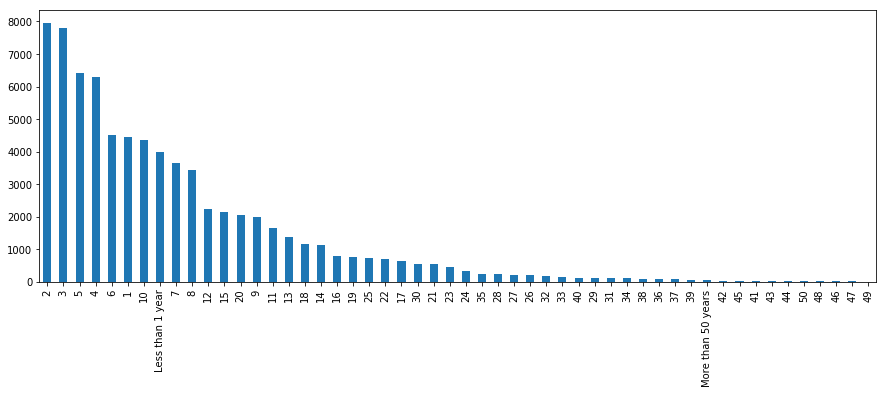

In [553]:
plt.figure(figsize =(15,5))
model_data.YearsCodePro.value_counts().plot.bar()

In [544]:
model_data.BetterLife.value_counts()

Yes    42102
No     25214
Name: BetterLife, dtype: int64

### Data Cleaning

In [605]:
def transform_gender(x):
    #gender
    if "Non-binary" in x or ";" in x:
        return "Other"
    else:
        return x


def clean_data(df):
    
    # drop Nans in Job-satisfaction column
    df.dropna(subset=["JobSat"] , inplace =True)
    
    # drop Nans in Company size column
    df.dropna(subset=["OrgSize"] , inplace =True)
    
    df = df[df.Age>=18]
    df.Age.fillna(df.Age.median(),inplace=True)
    
    # fill Nans and clean gender column
    df.Gender.fillna("Other",inplace=True)
    df.Gender = df.Gender.apply(transform_gender)
    
    #clean devType column and dummied it
    df.DevType.fillna("Nil",inplace=True)
    l = df.DevType.apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    for dev in pd.Series(flat_list).unique():
        df[dev] = df.DevType.apply(lambda x : 1 if dev in x else 0)
    df.drop(["DevType","Nil"],axis =1 ,inplace =True)
    
    #clean Work challege column and dummied it
    df.WorkChallenge.fillna("Nil",inplace=True)
    l = df.WorkChallenge.apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    for chall in pd.Series(flat_list).unique():
        df[chall] = df.WorkChallenge.apply(lambda x : 1 if dev in x else 0)
    df.drop(["WorkChallenge"],axis =1 ,inplace =True)
    
    #fill nans with "No opinion" in Better Life
    df.BetterLife.fillna("No opinion",inplace =True)                                       
    
    #transform and clean Years of coding column
    df.YearsCodePro = df.YearsCodePro.replace("Less than 1 year",0)
    df.YearsCodePro = df.YearsCodePro.replace("More than 50 years",55)
      #fill Nans with median
    df[(df.YearsCodePro!=0)&(df.YearsCodePro!=55)&
           (df.YearsCodePro.isna()==False)].YearsCodePro.astype(int).median()
    df.YearsCodePro.fillna(median_YearsCodePro,inplace =True)
    
    return df
  

In [606]:
a = clean_data(model_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\

In [608]:
a

,OrgSize,Age,Country,Gender,YearsCodePro,BetterLife,JobSat,Designer,"Developer, back-end","Developer, front-end",...,Distracting work environment,Inadequate access to necessary tools,Lack of support from management,Nil,Being tasked with non-development work,"Non-work commitments (parenting, school work, hobbies, etc.)",Not enough people for the workload,Meetings,Time spent commuting,Toxic work environment
2,100 to 499 employees,28.0,Thailand,Man,1,Yes,Slightly satisfied,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100 to 499 employees,22.0,United States,Man,0,Yes,Slightly satisfied,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"10,000 or more employees",30.0,Ukraine,Man,9,Yes,Slightly dissatisfied,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Just me - I am a freelancer, sole proprietor, ...",42.0,Ukraine,Man,4,No,Neither satisfied nor dissatisfied,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,10 to 19 employees,23.0,New Zealand,Man,4,No,Slightly satisfied,0,1,1,...,0,0,0,0,0,0,0,0,0,0
12,10 to 19 employees,28.0,United States,Man,8,Yes,Very satisfied,0,1,1,...,0,0,0,0,0,0,0,0,0,0
13,100 to 499 employees,31.0,Germany,Man,2,Yes,Very satisfied,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,100 to 499 employees,26.0,United Kingdom,Man,3,No,Slightly satisfied,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,20 to 99 employees,29.0,Australia,Man,2,Yes,Neither satisfied nor dissatisfied,0,1,1,...,0,0,0,0,0,0,0,0,0,0
18,100 to 499 employees,31.0,Brazil,Man,13,No,Very satisfied,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [595]:
a.WorkChallenge.fillna("None",inplace=True)

In [597]:
l = a.WorkChallenge.apply(lambda x : x.split(";")).to_list()
flat_list = [item for sublist in l for item in sublist]

In [599]:
def trans(df,col):
        #clean devType column and dummied it
    df[col].fillna("None",inplace=True)
    l = df.DevType.apply(lambda x : x.split(";")).to_list()
    flat_list = [item for sublist in l for item in sublist]
    for dev in pd.Series(flat_list).unique():
        df[dev] = df.DevType.apply(lambda x : 1 if dev in x else 0)

Distracting work environment                                    25742
Meetings                                                        22424
Being tasked with non-development work                          22341
Not enough people for the workload                              20770
Lack of support from management                                 16182
Inadequate access to necessary tools                            12771
Toxic work environment                                          12640
Time spent commuting                                            12385
Non-work commitments (parenting, school work, hobbies, etc.)    12201
None                                                             2055
dtype: int64

In [601]:
for dev in pd.Series(flat_list).unique():
        a[dev] = a.WorkChallenge.apply(lambda x : 1 if dev in x else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [603]:
a.WorkChallenge

2        Distracting work environment;Inadequate access...
3                                                     None
4        Being tasked with non-development work;Inadequ...
6        Being tasked with non-development work;Distrac...
8        Being tasked with non-development work;Inadequ...
12       Meetings;Non-work commitments (parenting, scho...
13       Being tasked with non-development work;Not eno...
15       Being tasked with non-development work;Distrac...
16       Distracting work environment;Meetings;Time spe...
18       Distracting work environment;Meetings;Time spe...
19       Lack of support from management;Non-work commi...
21       Being tasked with non-development work;Meeting...
22       Distracting work environment;Meetings;Non-work...
23       Being tasked with non-development work;Meeting...
24                                                    None
25       Being tasked with non-development work;Meeting...
28       Distracting work environment;Meetings;Non-work.